# 5. 誤差逆伝播法

本章は, 重みパラメータの勾配の計算を効率よく行う手法である誤差逆伝播法について扱う.

## 5.1 計算グラフ

計算グラフとは, 計算の過程をグラフによって表したものです. ここで言うグラフとは, データ構造としてグラフであり, 複数のノードとエッジ(ノード間を結ぶ直線)によって表現される.

### 5.1.1 計算グラフで解く

ノードと矢印によって計算の過程を表し, ノードは○で表記し, ○の中に演算の内容を記述する. また, 計算の途中結果を矢印の上部に書くことで, ノードごとの計算結果が左から右へ伝わるように表す. 例として下の問題と図のようなものである.

問1 : 太郎くんはスーパーで1個100円のリンゴを2個買いました. 支払う金額を求めなさい. ただし, 消費税が 10% 適用されるものとします.


問2 : 太郎くんはスーパーでリンゴを2個, みかんを3個買いました. リンゴは1個100円, みかんは1個150円です. 消費税が 10% かかるものとして, 支払う金額を求めなさい.

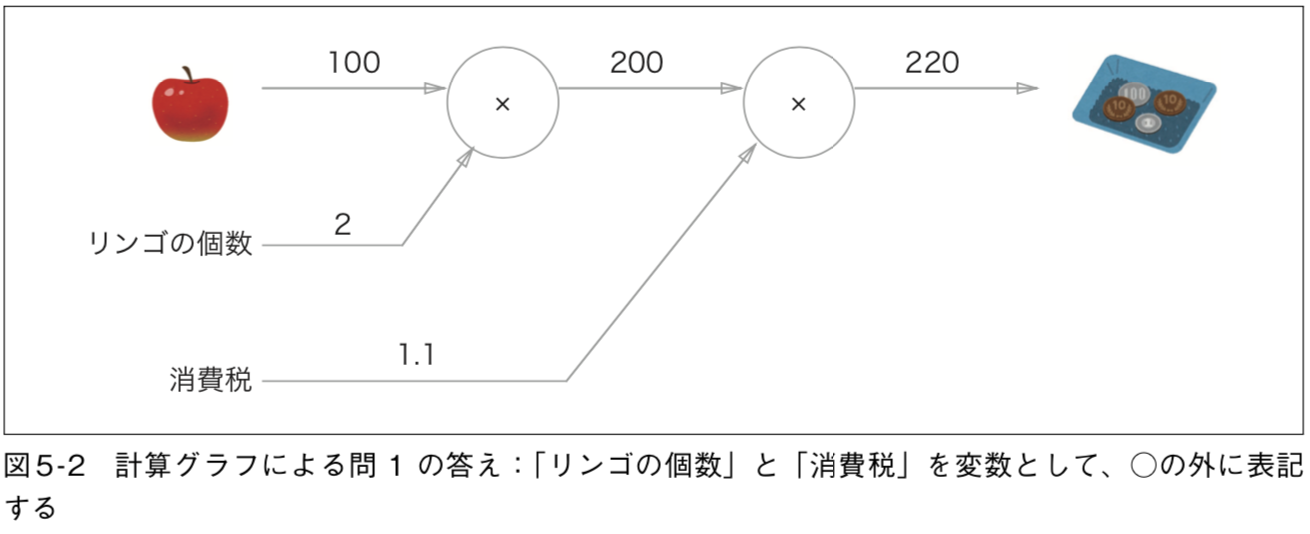

In [1]:
from IPython.display import Image, display
Image('images/fig5-2.png', width = 600)

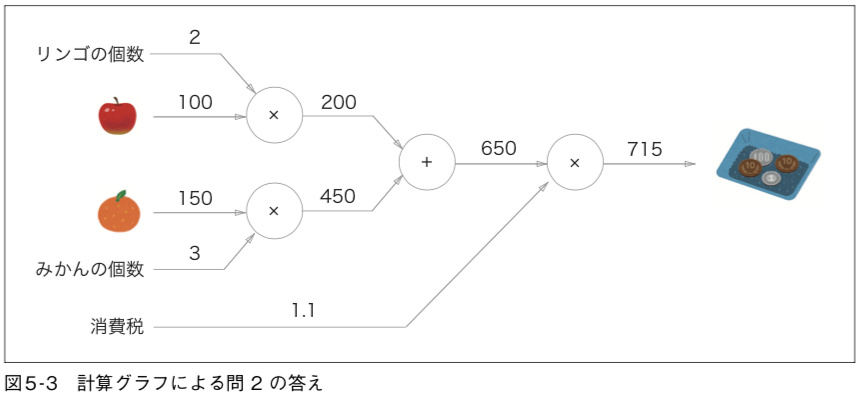

In [2]:
Image('images/fig5-3.png', width = 600)

計算を左から右へ進めるというステップは, 順伝搬 (forward propagation) という. 逆に右から左への伝搬を逆伝搬という.

### 5.1.2 局所的な計算

計算グラフの特徴は, 局所的な計算を伝搬することによって最終的な結果を得ることができる点にある. 局所的というのは, 自分に関係する小さな範囲, ということを意味する. つまり, 全体でどのようなことが行われていようとも, 自分に関係する情報だけから次の結果を出力することができる, ということである.

具体的には下図5-4のように, りんごを2個以外にもたくさんの買い物をしたときに, その中身が何でいくらか分からなくても合計が4000円だと分かれば, りんごと合わせた金額が4200円と分かるというようなものである.

このように計算グラフでは局所的な計算に集中することができ, たとえ全体の計算がどんなに複雑であったとしても, 各ステップでやることは, 対象とするノードの局所的な計算である. 局所的な計算は単純であるが, その結果を伝達することで, 全体を構成する複雑な計算の結果が得られる.

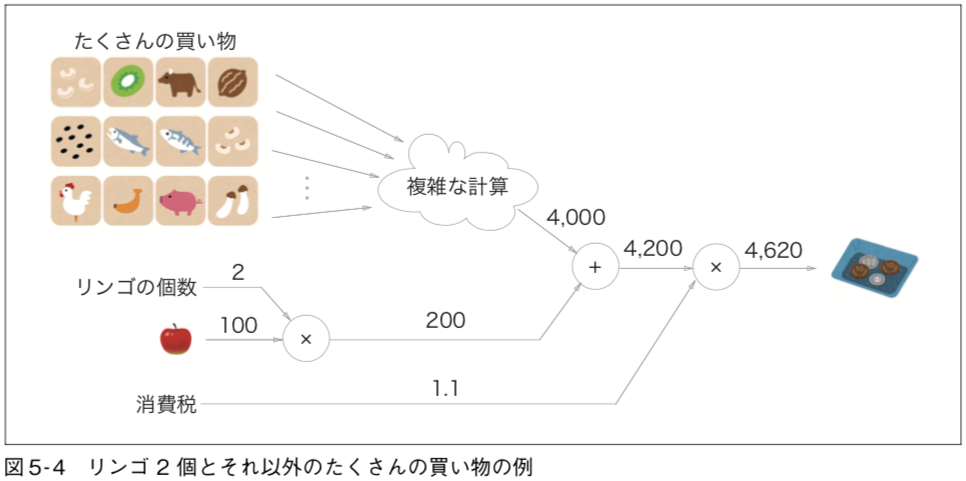

In [3]:
Image('images/fig5-4.png', width = 600)

### 5.1.3 なぜ計算グラフで解くのか

計算グラフの利点は, 前述したとおり, ひとつは, 局所的な計算にある. 別の利点としては, 計算グラフによって途中の計算の結果をすべて保持することができるという点である(りんご2個で200円とかそういうの). 最大の利点は, 逆方向の伝搬によって微分を効率良く計算できる点にある. 

計算グラフの逆伝播を説明するにあたって, 問1の問題をもう一度考える. 問1の問題では, リンゴを2個買って消費税を含めて最終的な支払金額を求めたが, ここで, リンゴの値段が値上がりした場合, 最終的な支払金額にどのように影響するかを知りたいとする. これは, ｢リンゴの値段に関する支払金額の微分｣を求めることに相当する. 記号で表すとすれば, リンゴの値段を $x$, 支払金額を $L$ とした場合, $\frac{\partial L}{\partial x}$ を求めることに相当する. この微分の値は, リンゴの値段が少しだけ値上がりした場合に, 支払金額がどれだけ増加するか, ということを表したものである.

先ほど述べたように、｢リンゴの値段に関する支払金額の微分｣のような値は, 計算グラフで逆方向の伝播を行えば求めることができる. 先に結果だけを示すと, 図5-5 のように計算グラフ上での逆伝播によって微分を求めることができる.

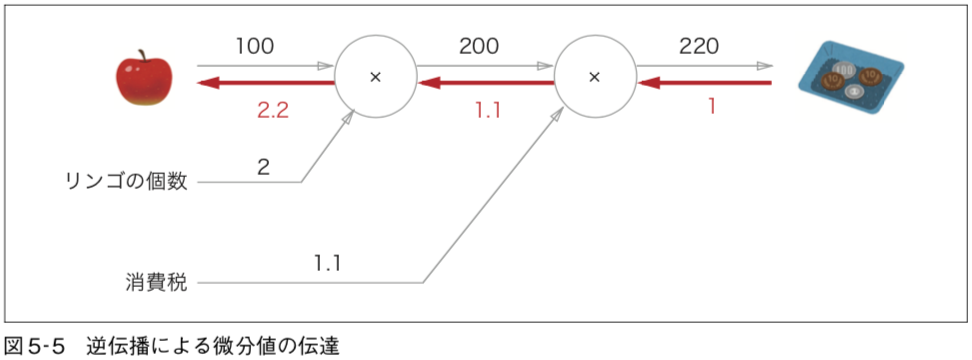

In [4]:
Image('images/fig5-5.png', width = 600)

図5-5に示すように, 逆伝播の場合は, 順方向とは逆向きの矢印によって図示する. 逆伝播は｢局所的な微分｣を伝達し, その微分の値は矢印の下側に書くことにする. この例の場合, 逆伝播は右から左へ｢1 → 1.1 → 2.2｣と微分の値が伝達されていく. この結果から, ｢リンゴの値段に関する支払金額の微分｣の値は2.2と言うことができる. これはリンゴが1円値上がりしたら, 最終的な支払金額が2.2円増えることを意味する(正確には, リンゴの値段がある微小な値だけ増えたら, 最終的な金額はその微小な値の2.2倍だけ増加することを意味する).

ここでは, リンゴの値段に関する微分だけを求めたが, ｢消費税に関する支払金額の微分｣や｢リンゴの個数に関する支払金額の微分｣も同様の手順で求めることができる. そして, その際には, 途中まで求めた微分(途中まで流れた微分)の結果を共有することができ, 効率良く複数の微分を計算することができる. このように, 計算グラフの利点は, 順伝播と逆伝播によって, 各変数の微分の値を効率良く求めることができる点にある.

## 5.2 連鎖律

局所的な微分を伝達する原理は, 連鎖律 (chain rule) によるものである.

### 5.2.1 計算グラフの逆伝搬

ここでは, $y = f(x)$ という計算があるとして, この計算の逆伝搬を図5-6に表す.

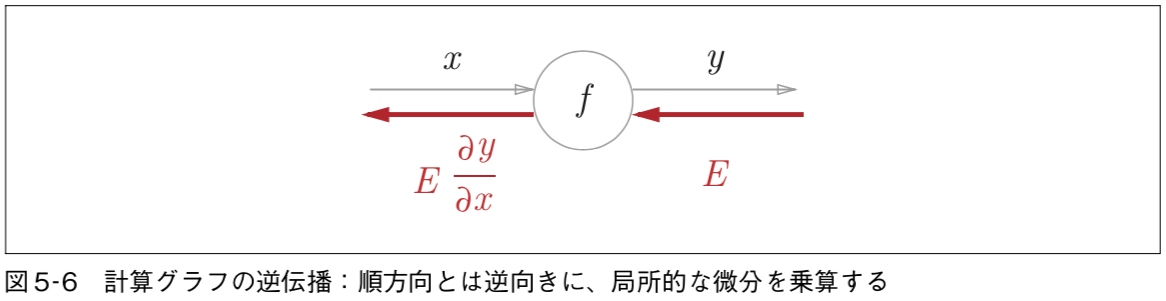

In [5]:
Image('images/fig5-6.png', width = 600)

図5-6に示すように, 逆伝搬の計算手順は, 信号 $E$ 対して, ノードの局所的な微分 $\frac{\partial y}{\partial x}$ を乗算し, それを次のノードへ伝達していく. ここでいう局所的な微分とは, 順伝搬での $y = f(x)$ という計算の微分を求めるということであり, これは $x$ に関する $y$ の微分 $\frac{\partial y}{\partial x}$ を求めることを意味する. そして, その局所的な微分を上流から伝達された値 (ここでは $E$ ) に乗算して, 前のノードへと渡していく.

以上が逆伝搬で行う計算手順であるが, この計算を行うころで, 目的とする微分の値を効率よく求めることができるのが逆伝搬のポイントである. このようなことが可能な理由は, 連鎖律の原理から来ている.

### 5.2.2 連鎖律とは

連鎖律とは合成関数の微分についての性質であり, 次のように定義される.

***ある関数が合成関数で表される場合, その合成関数の微分は, 合成関数を構成するそれぞれの関数の微分の積によって表すことができる.***

たとえば, $z = (x + y)^2$という合成関数は次の2式で表される.

$$
    z = t^2 \\
    t = x + y \tag{5.1}
$$

この式(5.1)の $x$ に関する偏微分は連鎖律に従って次のようになる.

$$
    \frac{\partial z}{\partial x} = \frac{\partial z}{\partial t} \frac{\partial t}{\partial x} = 2t \cdot 1 = 2(x + y) \tag{5.2}
$$

### 5.2.3 連鎖律と計算グラフ

式(5.2)で行った連鎖律の計算を, 計算グラフで表すと, 下図5.7のようになる.

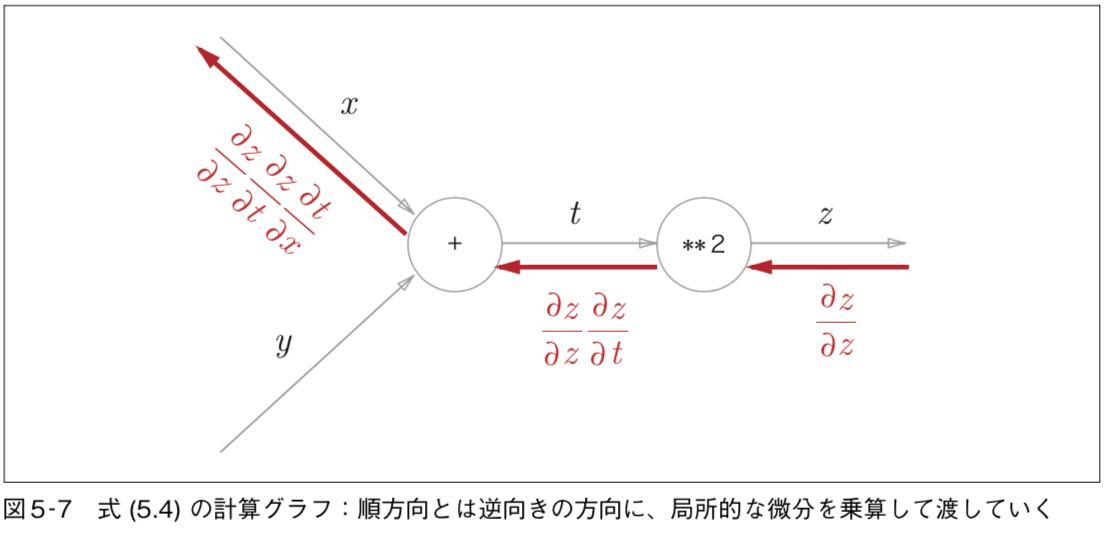

In [6]:
Image('images/fig5-7.png', width = 600)

逆伝搬の計算手順では, ノードの入力信号に対して, ノードの局所的な微分(偏微分)を乗算して次のノードへと伝達していく. たとえば, ｢**2｣への逆伝搬時の入力は, $\frac{\partial z}{\partial z}$ であり, これに局所的な微分である $\frac{\partial z}{\partial t}$ (順伝搬時には入力が $t$ で出力が $y$ だから)を乗算して, 次のノードへ渡していく. 

図5-7で注目すべきは, 1番左の逆伝搬の結果で, これは, 連鎖律より, $\frac{\partial z}{\partial x}$ と等しくなる.

なお, 先に行った偏微分は計算グラフでもできる.

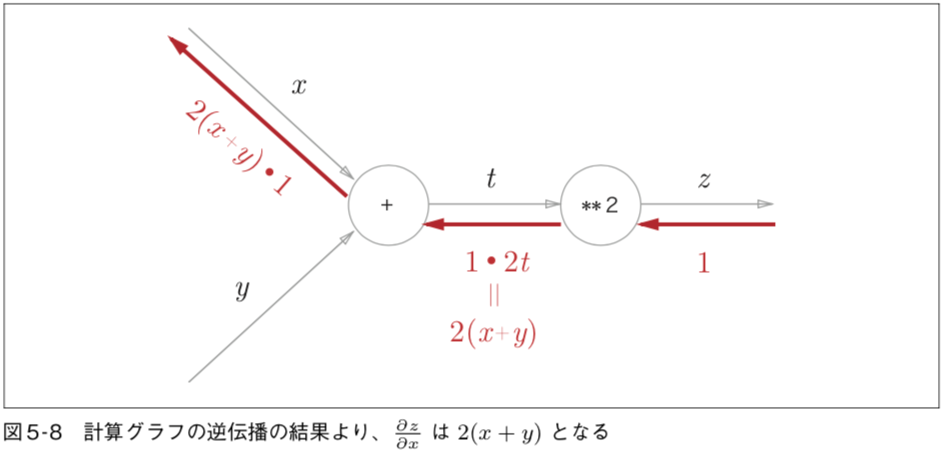

In [7]:
Image('images/fig5-8.png', width = 600)

## 5.3 逆伝搬

ここでは, $+$ や $\times$ など演算を例に, 逆伝搬の仕組みに触れる.

### 5.3.1 加算ノードの逆伝搬

$z = x + y$ という式を対象にして, その逆伝搬を見ていく. この式の偏微分は次にようになる.

$$
    \frac{\partial z}{\partial x} = 1 \\
    \frac{\partial z}{\partial y} = 1 \tag{5.3}
$$

式(5.3)のように, 求める偏微分は共に1となるから, 計算グラフで表すとすれば, 図5-9のようになる.

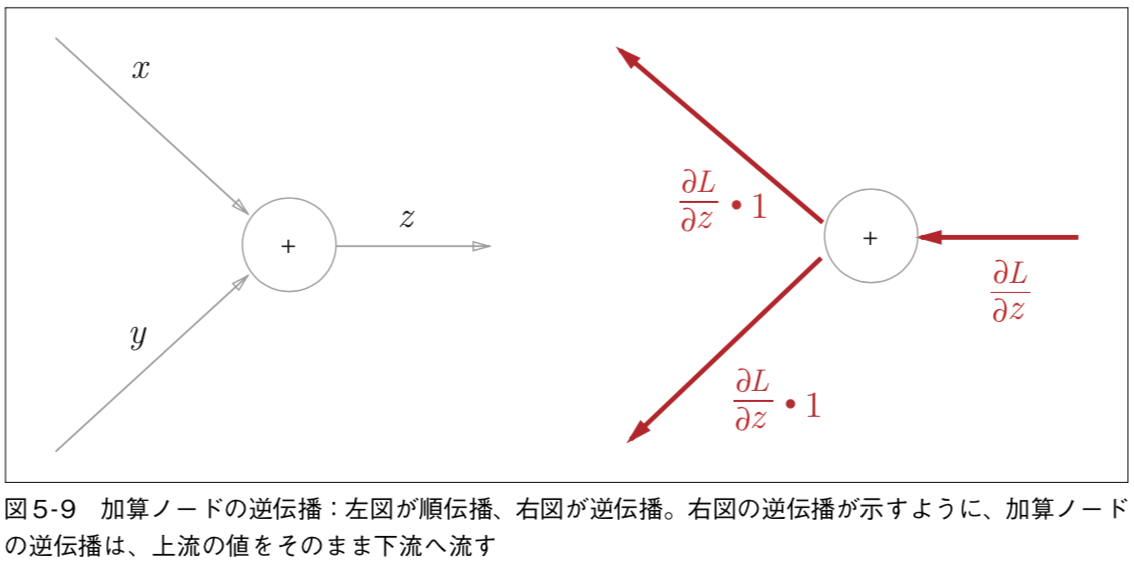

In [8]:
Image('images/fig5-9.png', width = 600)

このように加算ノードの逆伝搬は $1$ を乗算するだけなので, 入力された値をそのまま次のノードへ流すだけになる.

### 5.3.2 乗算ノードの逆伝搬

$z = x y$ という式を対象にして, その逆伝搬を見ていく. この式の偏微分は次にようになる.

$$
    \frac{\partial z}{\partial x} = y \\
    \frac{\partial z}{\partial y} = x \tag{5.4}
$$

式(5.4)のように, 求める偏微分は共に1となるから, 計算グラフで表すとすれば, 図5-12のようになる.

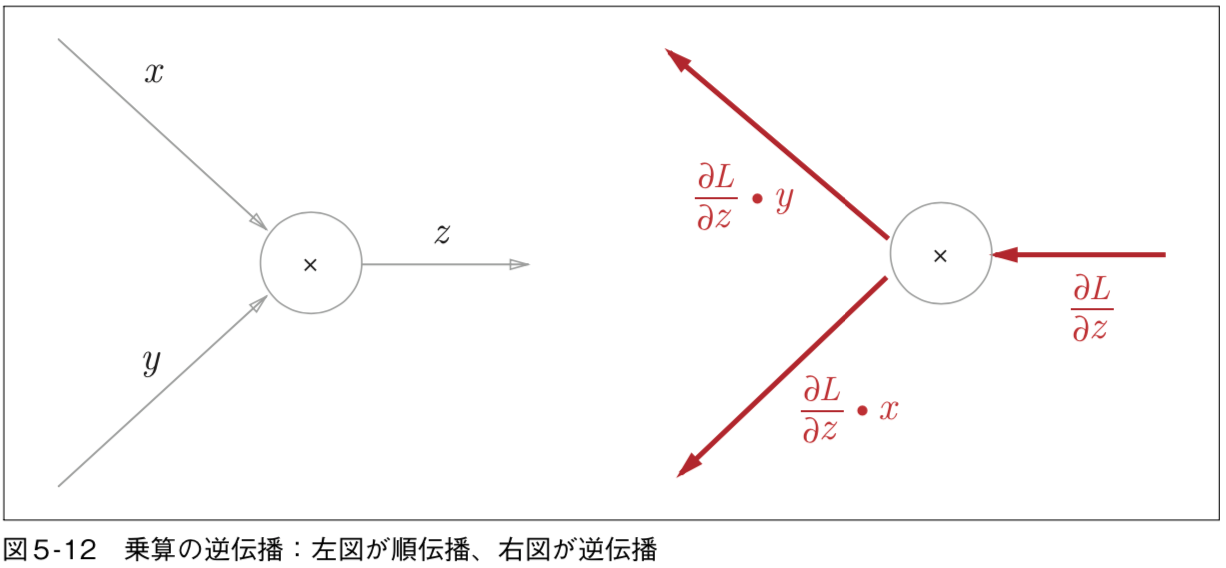

In [9]:
Image('images/fig5-12.png', width = 600)

このように, 乗算の逆伝搬は, 上流の値に, 順伝搬の際の入力信号をひっくり返した(入れ替えた)値を乗算して下流へ流す.

### 5.3.3 リンゴの例

リンゴの例を逆伝搬を使って解くと図5-14のようになる.

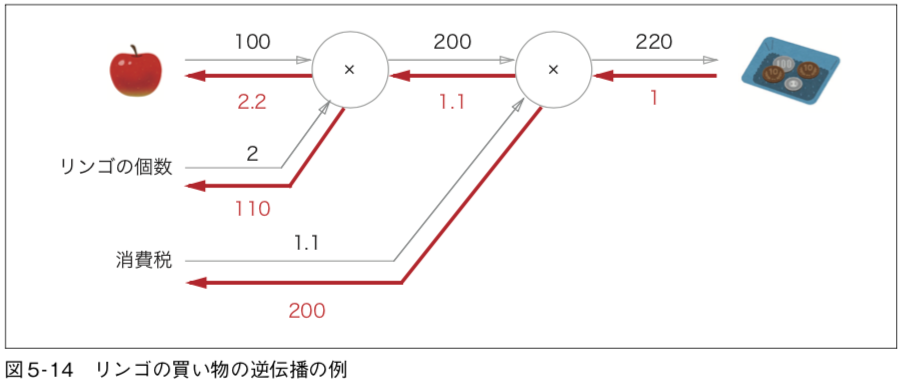

In [10]:
Image('images/fig5-14.png', width = 600)

## 5.4 単純なレイヤの実装

リンゴの例をPythonで実装していく. 計算グラフの乗算ノードを｢乗算レイヤ (MulLayer) ｣, 加算ノードを｢加算レイヤ (AddLayer) ｣という名前で実装する.

### 5.4.1 乗算レイヤの実装

レイヤは, forward() と backward() という共通のメソッド (インタフェース) を持つように実装する. forward() は順伝搬, backward() は逆伝搬に対応する.

乗算レイヤは次のように実装することができる. 

In [11]:
class MulLayer: # 乗算レイヤ
    def __init__(self):
        self.x = None
        self.y = None

    def forward(self, x, y):
        self.x = x
        self.y = y
        out = x * y

        return out

    def backward(self, dout):
        dx = dout * self.y
        dy = dout * self.x
        return dx, dy

これを使って図5-16の計算を行うと, 次のようになる.

In [12]:
apple = 100
apple_num = 2
tax = 1.1

# 乗算レイヤを指定
mul_apple_layer = MulLayer()
mul_tax_layer = MulLayer()

# 順伝搬
apple_price = mul_apple_layer.forward(apple, apple_num)
price = mul_tax_layer.forward(apple_price, tax)

# 逆伝搬
dprice = 1
dapple_price, dtax = mul_tax_layer.backward(dprice)
dapple, dapple_num = mul_apple_layer.backward(dapple_price)

print("price:", int(price))
print("dApple:", dapple)
print("dApple_num:", int(dapple_num))
print("dTax:", dtax)

price: 220
dApple: 2.2
dApple_num: 110
dTax: 200


### 5.4.2 加算レイヤの実装

加算レイヤは次のように実装できる.

In [13]:
class AddLayer: # 加算レイヤ
    def __init__(self):
        pass

    def forward(self, x, y):
        out = x + y

        return out

    def backward(self, dout):
        dx = dout * 1
        dy = dout * 1

        return dx, dy

加算レイヤと乗算レイヤを使って, 図5-17で示されるリンゴ2個とみかん3個の買い物を実装する.

In [14]:
apple = 100
apple_num = 2
orange = 150
orange_num = 3
tax = 1.1

# layer
mul_apple_layer = MulLayer()
mul_orange_layer = MulLayer()
add_apple_orange_layer = AddLayer()
mul_tax_layer = MulLayer()

# forward
apple_price = mul_apple_layer.forward(apple, apple_num)  # (1)
orange_price = mul_orange_layer.forward(orange, orange_num)  # (2)
all_price = add_apple_orange_layer.forward(apple_price, orange_price)  # (3)
price = mul_tax_layer.forward(all_price, tax)  # (4)

# backward
dprice = 1
dall_price, dtax = mul_tax_layer.backward(dprice)  # (4)
dapple_price, dorange_price = add_apple_orange_layer.backward(dall_price)  # (3)
dorange, dorange_num = mul_orange_layer.backward(dorange_price)  # (2)
dapple, dapple_num = mul_apple_layer.backward(dapple_price)  # (1)

print("dApple:", dapple)
print("dApple_num:", int(dapple_num))
print("dOrange:", dorange) # なぜか3.3にならない
print("dOrange_num:", int(dorange_num))
print("dTax:", dtax)

dApple: 2.2
dApple_num: 110
dOrange: 3.3000000000000003
dOrange_num: 165
dTax: 650


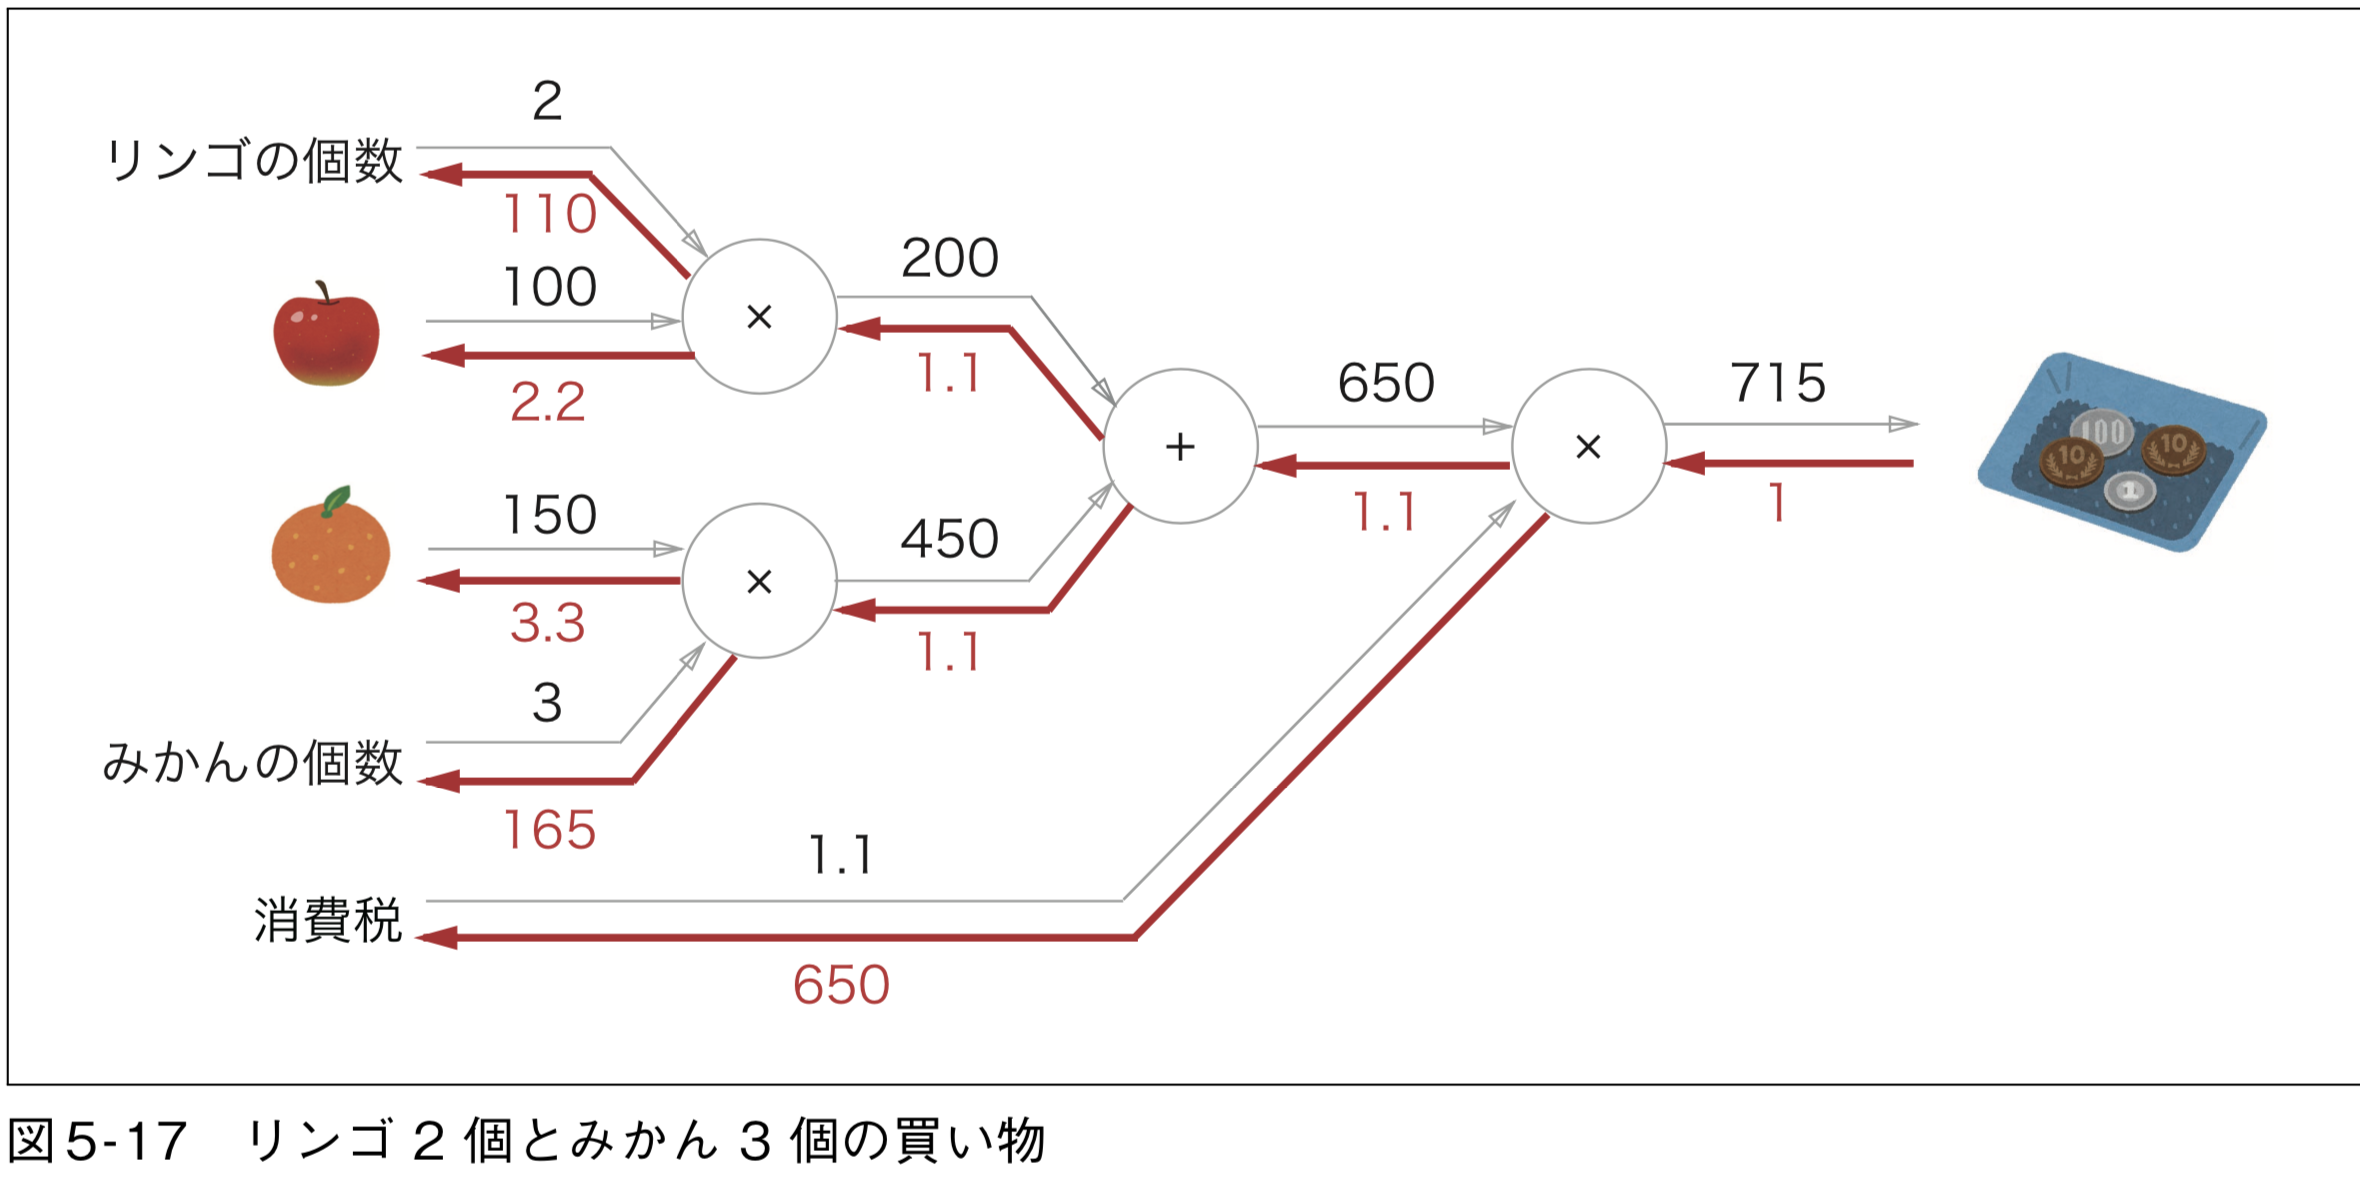

In [15]:
Image('images/fig5-17.png', width = 600)

## 5.5 活性化関数レイヤの実装

### 5.5.1 ReLUレイヤ

活性化関数として使われるReLUは次式で表された.

$$
\begin{eqnarray}
y =
    \left\{
        \begin{array}{l}
        x\ \     (x > 0)\\
        0\ \     (x \le 0)   \tag{5.5}
        \end{array}
    \right.
\end{eqnarray}
$$

これより, $x$ に関する $y$ の微分は次のようになる.

$$
\begin{eqnarray}
\frac{\partial y}{\partial x}=
    \left\{
        \begin{array}{l}
        1\ \     (x > 0)\\
        0\ \     (x \le 0)   \tag{5.6}
        \end{array}
    \right.
\end{eqnarray}
$$

式(5.6)で表されるように, 順伝搬時の入力である $x$ が 0 より大きければ, 逆伝搬は上流の値をそのまま下流に流す. 逆に 0 以下であれば, 逆伝搬では下流への信号は流れない. 計算グラフで表すと下図5-18のようになる.

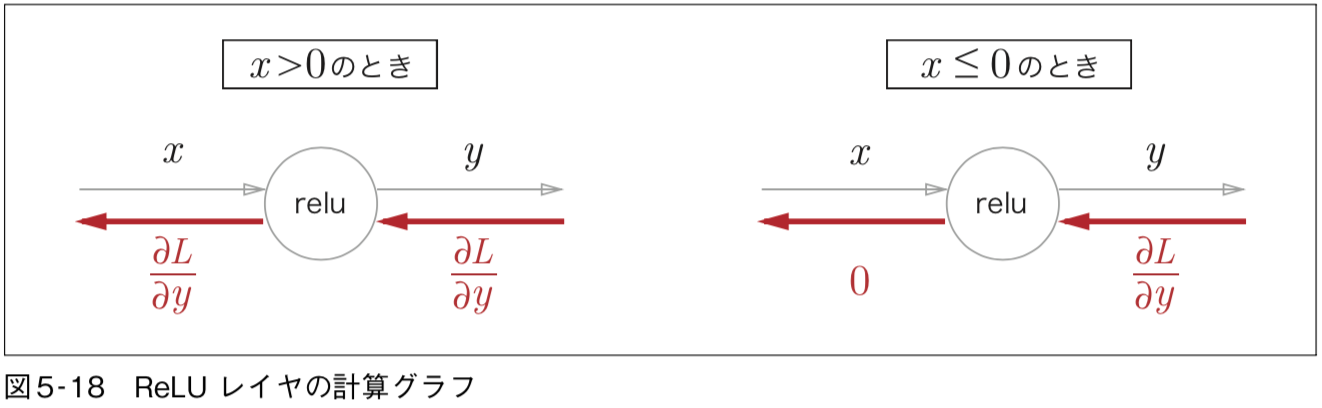

In [16]:
Image('images/fig5-18.png', width = 600)

このReLUレイヤを実装する. 

In [17]:
class Relu:
    def __init__(self):
        self.mask = None

    def forward(self, x):
        self.mask = (x <= 0)
        out = x.copy() # コピー生成
        out[self.mask] = 0 # outのTrueの場所を0に

        return out

    def backward(self, dout):
        dout[self.mask] = 0 # 順伝搬時に保持したmaskを使う
        dx = dout

        return dx

Reluクラスは, インスタンス変数としてmaskという変数を持つ. このmask変数は True/FalseからなるNumPy配列で, 順伝搬の入力である $x$ の要素で 0 以下の場所をTrue, それ以外を Falseとして保持する. 

### 5.5.2 Sigmoidレイヤ

シグモイド関数は次式で表された.

$$
    y = \frac{1}{1 + \exp(-x)} \tag{5.7}
$$

計算グラフで表すと次の図5-19のようになる.

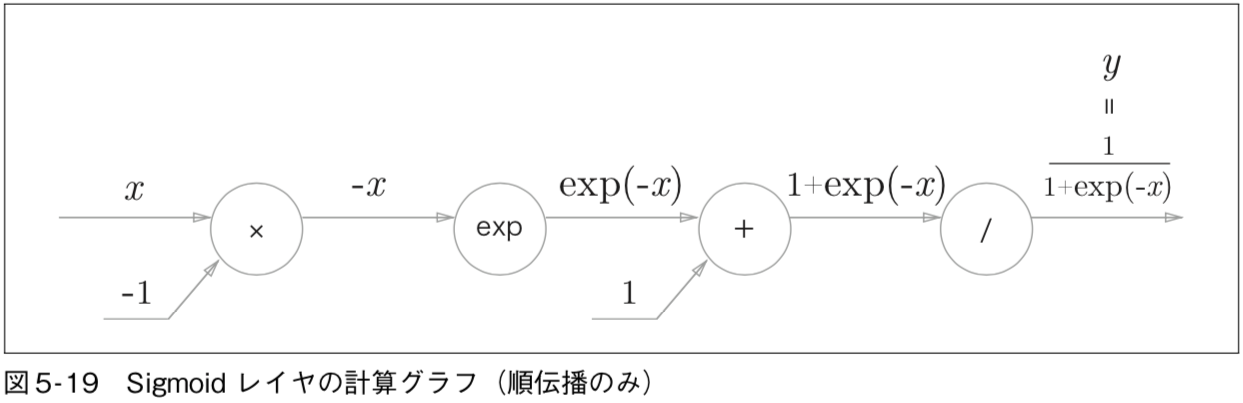

In [18]:
Image('images/fig5-19.png', width = 600)

｢$\exp$｣ ノードは $y = \exp (x)$ の計算を行い, ｢$/$｣ ノードは $y = \frac{1}{x}$ の計算を行う. 図5-19に示すように, 式(5.7)の計算は, 局所的な計算の伝搬によって構成されている. 

逆伝搬について以下に記す. 

｢$/$｣ ノードは $y = \frac{1}{x}$ を表し, 

$$
    \frac{\partial y}{\partial x} = -\frac{1}{x^2} = - y^2 \tag{5.8}
$$

｢$\exp$｣ ノードは $y = \exp (x)$ を表し,

$$
    \frac{\partial y}{\partial x} = \exp(x) \tag{5.9}
$$

となるから, Sigmoidレイヤの逆伝搬は次の図5-20のようになる.

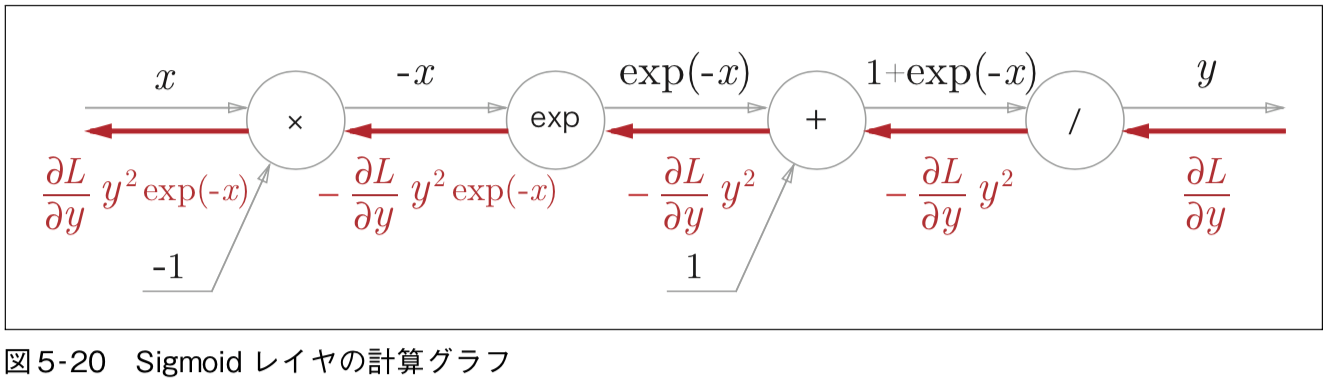

In [19]:
Image('images/fig5-20.png', width = 600)

図5-20の結果から, 逆伝搬の出力は $\frac{\partial L}{\partial y} y^2 \exp(-x)$ となり, これは順伝搬の入力 $x$ と出力 $y$だけから計算できる. よって, 図5-20は, 次の図5-21のようなグループ化した ｢sigmoid｣ノードとして書くことができる.

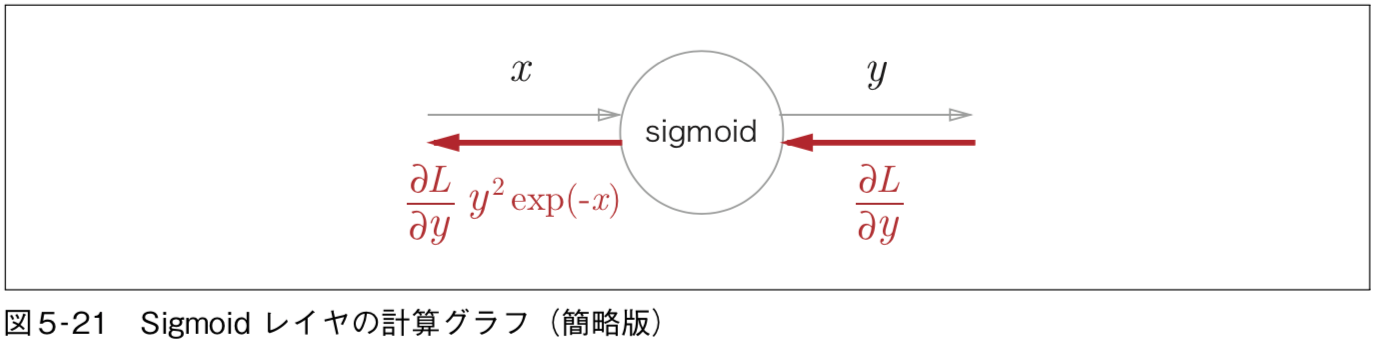

In [20]:
Image('images/fig5-21.png', width = 600)

ノードをグループ化することによって, Sigmoid レイヤの細かい中身を気にすることなく, その入力と出力だけに集中することができる. 

また, $\frac{\partial L}{\partial y} y^2 \exp(-x)$ はさらに, 次のように整理して書ける.

$$
    \begin{eqnarray}
    \frac{\partial L}{\partial y} y^2 \exp(-x) &=& \frac{\partial L}{\partial y} \frac{1}{(1 + \exp(-x))^2}\exp(-x) \\
    &=& \frac{\partial L}{\partial y} \frac{1}{1 + \exp(-x)} \frac{\exp(-x)}{1 + \exp(-x)} \\
    &=& \frac{\partial L}{\partial y} y (1 - y) \tag{5-10}
    \end{eqnarray}
$$

そのため, 図5-21で表される Sigmoid レイヤの逆伝搬は, 順伝搬の出力だけから計算することができる.

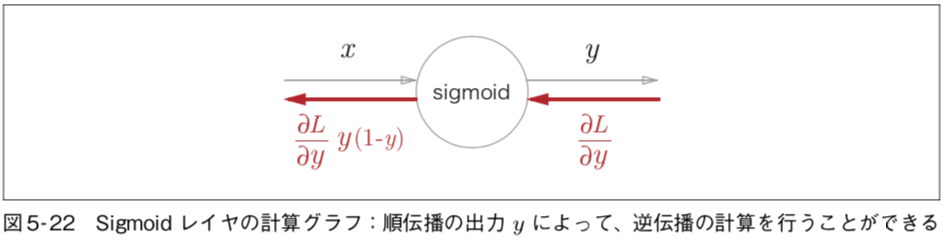

In [21]:
Image('images/fig5-22.png', width = 600)

Sigmoid レイヤをPythonで実装する.

In [22]:
class Sigmoid:
    def __init__(self):
        self.out = None

    def forward(self, x):
        out = sigmoid(x)
        self.out = out
        return out

    def backward(self, dout):
        dx = dout * (1.0 - self.out) * self.out

        return dx

この実装では, 順伝搬時に出力にインスタンス変数の out を保持しておき, 逆伝搬時に, その out 変数を使って計算を行う.

## 5.6 Affine / Softmax レイヤの実装

### 5.6.1 Affine レイヤ

ニューラルネットワークの順伝搬では, 重み付き信号の総和を計算するために, 行列の内積を使った. 以前に次のような実装を行った.

In [23]:
import numpy as np
X = np.random.rand(2) # 入力
W = np.random.rand(2,3) # 重み
B = np.random.rand(3) # バイアス
X.shape # (2,)
W.shape # (2, 3)
B.shape # (3,)
Y = np.dot(X, W) + B

ここでは, X, W, B は, それぞれ形状が, (2,), (2, 3), (3,)  の多次元配列であるとすると, ニューロンの重み付き和は, Y = np.dot(X, W) + B のように計算できる. そして, この Y が活性化関数によって変換され, 次の層へ伝搬される, というのがニューラルネットワークの流れである. ここで行った計算を計算グラフで表すと次の図5-24のようになる.

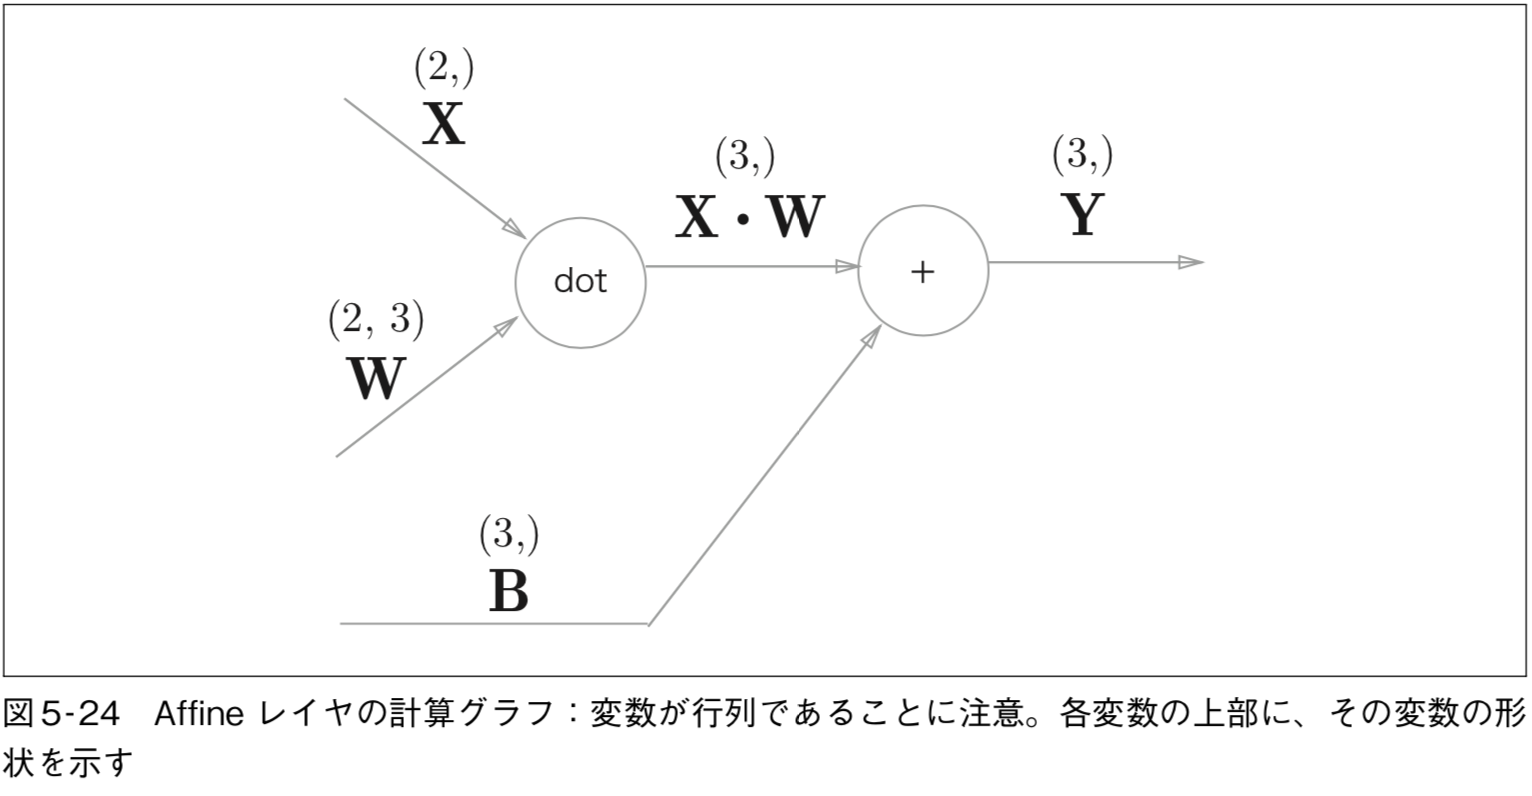

In [24]:
Image('images/fig5-24.png', width = 600)

ここで, X, W, B は多次元配列であるから, この例では行列がノード間を伝搬する(今まではスカラ).

行列を対象とする逆伝搬を求める場合は, 行列の要素ごとに書き下すことで, これまでのスカラ値を対象とした計算グラフと同じ手順で考えることができる. 実際に書き下してみると次の式が得られる.

$$
    \frac{\partial L}{\partial \mathbf{X}} = \frac{\partial L}{\partial \mathbf{Y}} \cdot \mathbf{W^T} \\
    \frac{\partial L}{\partial \mathbf{W}} = \mathbf{X^T} \cdot \frac{\partial L}{\partial \mathbf{Y}} \tag{5.11}
$$

この式(5.11)を元に, 計算グラフの逆伝搬を行うと, 次の図5-25のようになる.

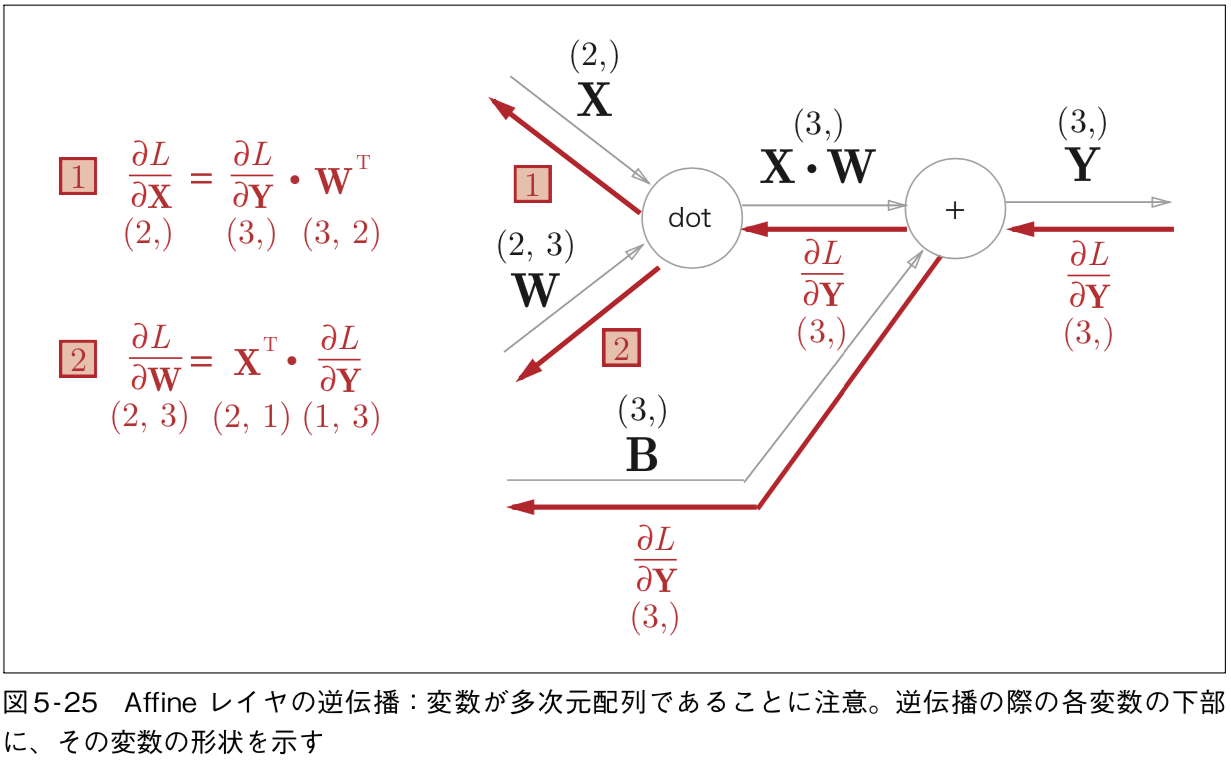

In [25]:
Image('images/fig5-25.png', width = 600)

### 5.6.2 バッチ版 Affine レイヤ

ここでは, N 個のデータをまとめて順伝搬する場合, つまり, バッチ版の Affine レイヤを考える. バッチ版 Affine レイヤは図5-27のようになる.

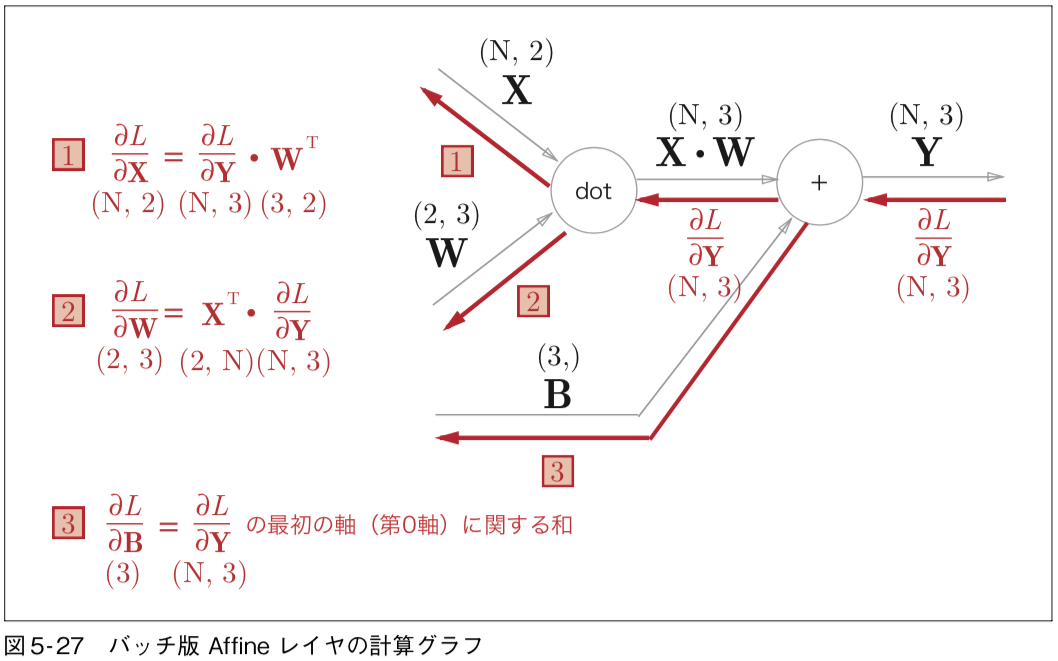

In [26]:
Image('images/fig5-27.png', width = 600)

バイアスの加算に際して, バッチになることで変更点があり, 順伝搬の際のバイアスの加算は, $\mathbf{X} \cdot \mathbf{W}$ に対して, バイアスがそれぞれのデータに加算される. そのため, 逆伝搬の際には, それぞれの逆伝搬の値がバイアスの要素に集約される必要がある.

したがって, Affine の実装は次のようになる.

In [27]:
class Affine :
    def __init__(self, W, b) :
        self.W = W
        self.b = b
        self.x = None
        self.dW = None
        self.dW = None
    
    def forward(self, x) :
        self.x = x
        out = np.dot(x, self.W) + self.b
        
        return out
    
    def backward(self, dout) :
        dx = np.dot(dout, self.W.T)
        self.dW = np.dot(self.x.T, dout)
        self.db = np.sum(dout, axis = 0)
        
        return dx

### 5.6.3 Softmax-with-Loss レイヤ

出力層であるソフトマックス関数について扱う. 例として, 手書き数字認識の場合, Softmax レイヤの出力は図5-28のようになる. Softmax レイヤは, 入力された値を正規化して出力する. なお, 手書き数字認識は, 10クラス分類を行うため, Softmax レイヤへの入力は10個あることになる.

ニューラルネットワークで行う処理には推論と学習の2つのフェーズがあり, 推論では, 通常 Softmax レイヤは使用しない. たとえば, 図5-28のネットワークで推論を行う場合, 最後の Affine レイヤの出力を認識結果として用いる. なお, ニューラルネットワークの正規化しな出力結果をスコアと呼ぶことがあり, 推論で答えをひとつだけ出す場合は, スコアの最大値だけ用いればよく, Softmax関数は必要ないことになる. 一方, 学習の際は, Softmax レイヤが必要となる.

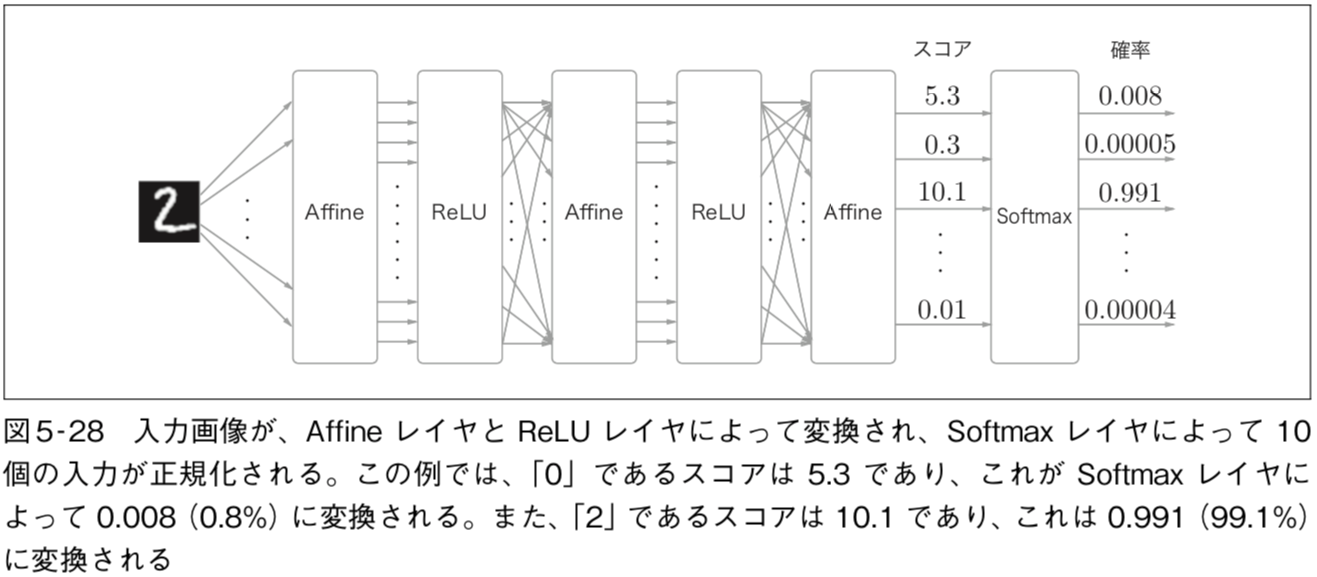

In [28]:
Image('images/fig5-28.png', width = 600)

Softmax レイヤを実装していくが, ここでは, 損失関数である交差エントロピー誤差も含めて, Softmax-with-Loss レイヤという名前のレイヤで実装する. 図5-29に Softmax-with-Loss レイヤの計算グラフを示す.

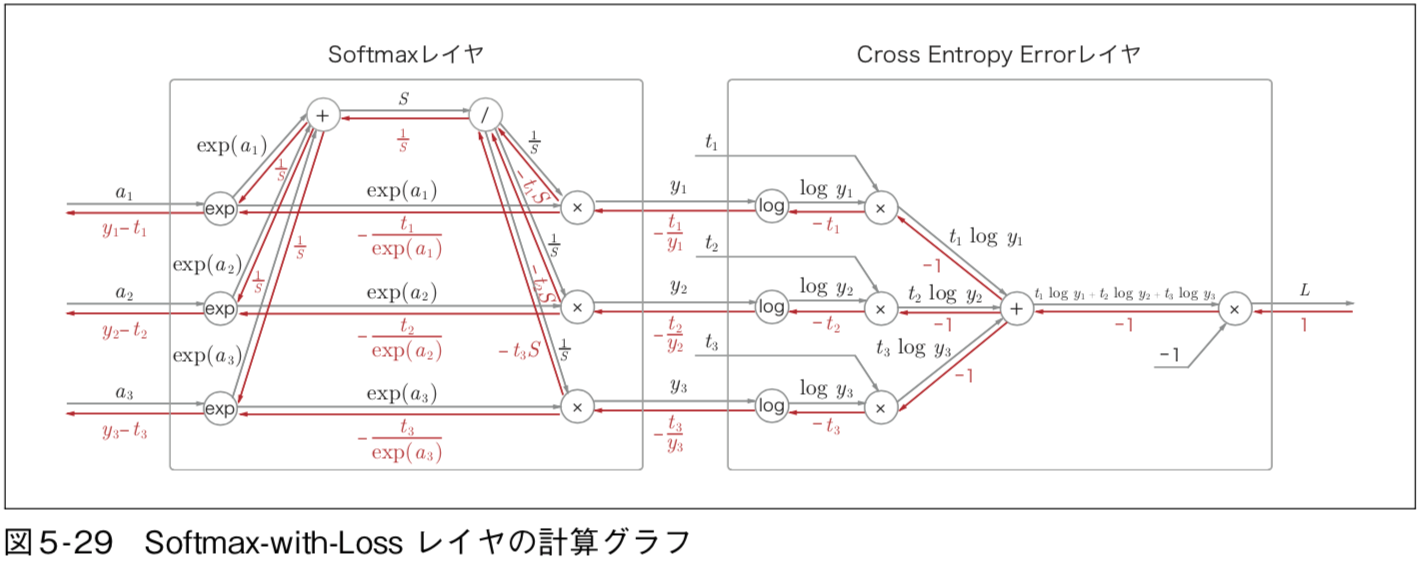

In [29]:
Image('images/fig5-29.png', width = 600)

これを簡略して書くと図5-30のようになる.

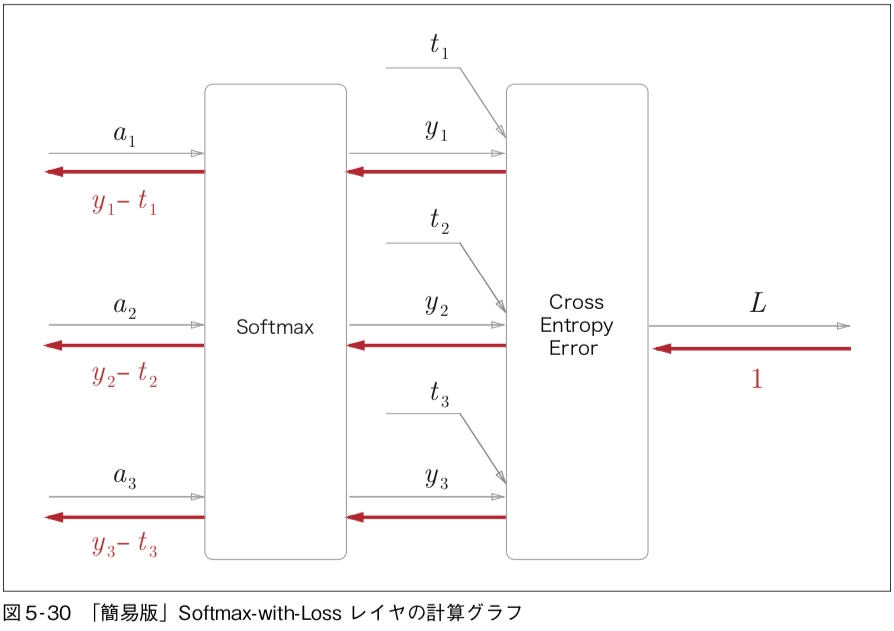

In [30]:
Image('images/fig5-30.png', width = 500)

図5-30の計算グラフでは, ソフトマックス関数は Softmax レイヤとして, 交差エントロピー誤差は Cross Entropy Error レイヤとして表記する. ここでは, 3クラス分類を行う場合を想定し, 前レイヤから3つの入力(スコア)を受け取るものとする. 図5-30に示すように, Softmax レイヤは, 入力である $(a_1, a_2, a_3)$ を正規化して, $(y_1, y_2, y_3)$ を出力する. Cross Entropy Error レイヤは, Softmax の出力 $(y_1, y_2, y_3)$ と, 教師ラベルの $(t_1, t_2, t_3)$ を受け取り, それらのデータから損失 $L$を出力する.

逆伝搬の結果に注目すると, Softmax レイヤからの逆伝搬は, $(y_1 - t_1, y_2 - t_2 , y_3 - t_3)$ というSoftmax レイヤの出力と教師ラベルの差分のキレイな結果になっている. ニューラルネットワークの逆伝搬では, この差分である誤差が前レイヤへと伝わっていく. これはニューラルネットワークの学習における重要な性質である.

ニューラルネットワークの学習の目的は, 二ューラルネットワークの出力(Softmax の出力)を教師ラベルに近づけるように, 重みパラメータを調整するこ とである. そのため, ニューラルネットワークの出力と教師ラベルとの誤差を効率良く, 前レイヤに伝える必要がある. 先ほどの $(y_1 − t_1, y_2 − t_2, y_3 − t_3)$ という結果は, まさに Softmax レイヤの出力と教師ラベルの差であり, 現在のニューラルネットワークの出力と教師ラベルの誤差を素直に表している.

Softmax-with-Loss レイヤの実装は次のようになる.

In [31]:
def softmax(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T 

    x = x - np.max(x) # オーバーフロー対策
    return np.exp(x) / np.sum(np.exp(x))

In [32]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    # 教師データがone-hot-vectorの場合、正解ラベルのインデックスに変換
    if t.size == y.size:
        t = t.argmax(axis=1)
             
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

In [33]:
class SoftmaxWithLoss:
    def __init__(self):
        self.loss = None
        self.y = None # softmaxの出力
        self.t = None # 教師データ

    def forward(self, x, t):
        self.t = t
        self.y = softmax(x)
        self.loss = cross_entropy_error(self.y, self.t)
        
        return self.loss # 損失関数

    def backward(self, dout=1):
        batch_size = self.t.shape[0]
        if self.t.size == self.y.size: # 教師データがone-hot-vectorの場合
            dx = (self.y - self.t) / batch_size # (正規化された出力 - 教師ラベルの差分) / バッチサイズ : データ1個あたりの誤差
        else:
            dx = self.y.copy()
            dx[np.arange(batch_size), self.t] -= 1
            dx = dx / batch_size
            # 勾配は、各データの和。バッチ数を増やすと大きな値になる。1個分の勾配とするために、バッチ数で割る必要がある？
            # TensorFlowの｢tf.nn.softmax_cross_entropy_with_logits｣とかは、各データのクロスエントロピーを出力するから学習時も一個分にしておく？
            # TensorFlowがそうしてるからここも真似てる説
        
        return dx # 誤差逆伝播法で求めた勾配

### 5.7 誤差逆伝播法の実装

### 5.7.1 ニューラルネットワークの学習の全体図

ニューラルネットワークの学習手順の確認をしよう.

**前提**  
ニューラルネットワークは, 適応可能な重みとバイアスがあり, この重みとバイアスを訓練データに適応するように調整することを「学習」と呼ぶ. ニュー ラルネットワークの学習は次の 4 つの手順で行う. 

**ステップ1 (ミニバッチ)**  
訓練データの中からランダムに一部のデータを選び出す. その選ばれたデータをミニバッチといい, ここではそのミニバッチの損失関数を減らすことを目的とする.

**ステップ2 (勾配の算出)**  
ミニバッチの損失関数を減らすために, 各重みパラメータの勾配を求める. 勾配は, 損失関数の値を最も減らす方向を示す.

**ステップ3 (パラメータの更新)**  
重みパラメータを勾配方向に微小量だけ更新する.

**ステップ4 (繰り返す)**  
ステップ 1、ステップ 2、ステップ 3 を繰り返す.

誤差逆伝播法をステップ2の勾配の算出の際に用いて学習を行う. 誤差逆伝播法は高速に効率よく勾配を求めることができる.

### 5.7.2 誤差逆伝播法に対応したニューラルネットワークの実装

ここでは, 2層のニューラルネットワークを TwoLayerNet として実装する. このクラスのインスタンス変数とメソッドを整理して, 表5-1, 5-2に示す.

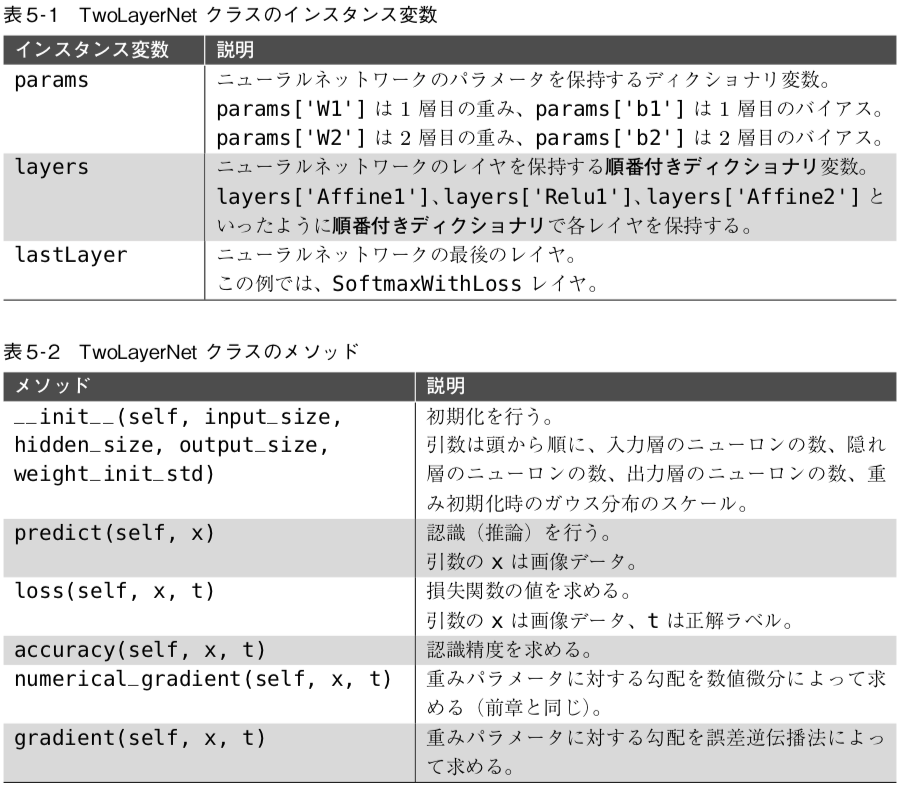

In [34]:
Image('images/table5-1-2.png', width = 600)

In [35]:
def numerical_gradient(f, x): # 使わない
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:
        idx = it.multi_index
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x) # f(x+h)
        
        x[idx] = tmp_val - h 
        fxh2 = f(x) # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        
        x[idx] = tmp_val # 値を元に戻す
        it.iternext()   
        
    return grad

In [39]:
from collections import OrderedDict


class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std = 0.01):
        # 重みの初期化
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size) 
        self.params['b2'] = np.zeros(output_size)

        # レイヤの生成
        self.layers = OrderedDict()
        self.layers['Affine1'] = Affine(self.params['W1'], self.params['b1'])
        self.layers['Relu1'] = Relu()
        self.layers['Affine2'] = Affine(self.params['W2'], self.params['b2'])

        self.lastLayer = SoftmaxWithLoss()
        
    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)
        
        return x
        
    # x:入力データ, t:教師データ
    def loss(self, x, t):
        y = self.predict(x)
        return self.lastLayer.forward(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        if t.ndim != 1 : t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
        
    # x:入力データ, t:教師データ
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
        
    def gradient(self, x, t):
        # forward
        loss = self.loss(x, t)

        # backward
        dout = 1
        dout = self.lastLayer.backward(dout)
        
        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)

        # 設定
        grads = {}
        grads['W1'], grads['b1'] = self.layers['Affine1'].dW, self.layers['Affine1'].db
        grads['W2'], grads['b2'] = self.layers['Affine2'].dW, self.layers['Affine2'].db

        return grads

順番付きのディクショナリである, OrderedDict としてレイヤを保持することで, ディクショナリに追加した順番を保持しておくことができる. そのため, ニューラルネットワークの順伝搬では, 追加した順にレイヤの forward() メソッドを呼び出すだけで処理が完了する. また, 逆伝搬では, 逆の順番でレイヤを呼び出す. Affine レイヤや ReLU レイヤが, それぞれの内部で順伝搬と逆伝搬を正しく処理してくれるため, ここで行うことは, レイヤを正しい順番で連結し, 順番(逆順)にレイヤを呼び出すだけである.

このように, ニューラルネットワークの構成要素をレイヤとして実装したことによって, ニューラルネットワークを簡単に構築できる. レイヤとしてモジュール化する実装によって別の大きなネットワークを作りたいときにも, 必要なレイヤを追加するだけでニューラルネットワークを作ることができる.

### 5.7.3 誤差逆伝播法の勾配確認

勾配を求める方法として, 数値微分によるものと, 誤差逆伝播法を用いて解析的に解く2つの方法を扱った. 誤差逆伝播法を用いることで, 大量のパラメータが存在しても効率的に計算ができるため, 今後は誤差逆伝播法によって勾配を求めることとする.

誤差逆伝播法で求めた勾配が正しいかどうかの確認をするために数値微分が用いられる. 数値微分は実装が簡単であるため, 実装時のミスが起きにくく, 一方, 誤差逆伝播法の実装は複雑になるためミスが起きやすいのが一般的である. そこで, 数値微分と誤差逆伝播法の結果を比較して, 誤差逆伝播法の正しさを確認することがよく行われる. これを勾配確認という. 勾配確認の実装を次に示す.

In [40]:
import sys, os
sys.path.append(os.pardir) 
from dataset.mnist import load_mnist

# データの読み込み
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

x_batch = x_train[:3]
t_batch = t_train[:3]

grad_numerical = network.numerical_gradient(x_batch, t_batch)
grad_backprop = network.gradient(x_batch, t_batch)

for key in grad_numerical.keys():
    diff = np.average( np.abs(grad_backprop[key] - grad_numerical[key]) ) # 誤差計算
    print(key + ":" + str(diff))

()
W1:4.42283719575664e-10
b1:2.7746310683925134e-09
W2:6.147863003327676e-09
b2:1.3962009720175362e-07


この結果から, 数値微分と誤差逆伝播法でそれぞれ求めた勾配の差はかなり小さいことがわかる. これにより, 誤差逆伝播法の実装に誤りがないことの信憑性が増す.

### 5.7.4 誤差逆伝播法を使った学習

誤差逆伝播法を使ったニューラルネットワークの学習の実装を行う. これまでと異なる点は, 誤差逆伝播法で勾配を求めるという点だけである.

In [41]:
# データの読み込み
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

# パラメータ更新の回数
iters_num = 10000

train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1エポックあたりの繰り返し数
iter_per_epoch = max(train_size / batch_size, 1) # ここでは 60000/100 = 600

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 勾配
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)
    
    # 更新
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    # 1エポックごとに認識精度を計算
    if i % iter_per_epoch == 0: # ( i は 10000まで)
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print(train_acc, test_acc)

()
0.1128 0.1143
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()

()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
0.9484 0.9468
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()

()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
(

()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
0.9730166666666666 0.9653
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()

## 5.8 まとめ

視覚的に計算の過程を表す計算グラフという方法を学んだ. この計算グラフを用いて, ニューラルネットワークで行う誤差逆伝播法を説明し, またニューラルネットワークで行う処理をレイヤという単位で実装した. ReLU レイヤや Softmax-with-Loss レイヤ などのレイヤには, forward や backward というメソッドが実装されており, データを順方向と逆方向に伝搬することで, 重みパラメータの勾配を効率的に求めることができる. レイヤによるモジュール化によって, ニューラルネットワークでは, レイヤを自由に組み合わせることができ, 自分の好きなネットワークを簡単につくることができる.